In [1]:
import os, re, math
import numpy as np
import pandas as pd

FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava7b_Eval\Random\vlat_llava7b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava7b_Eval\Random\vlat_llava7b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava7b_Eval\Random\vlat_llava7b_run_03.csv",
]
GROUP_COL = "Task"   # <- change to "Task" / "VizTask" for the visualization-task table
OUT_CSV   = "llava7b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task       mean         sd         se  \
0                       Determine Range  26.666667  30.550505  17.638342   
1                        Find Anomalies  16.666667  28.867513  16.666667   
2                         Find Clusters  33.333333  28.867513  16.666667   
3              Find Correlations/Trends  75.000000  25.000000  14.433757   
4                         Find Extremum  20.833333  14.433757   8.333333   
5         Find Extremum (derived value)   0.000000   0.000000   0.000000   
6        Find Extremum (relative value)  22.222222  19.245009  11.111111   
7   Identify the Hierarchical Structure  66.666667  57.735027  33.333333   
8                      Make Comparisons  41.666667  38.188131  22.047928   
9     Make Comparisons (absolute value)  33.333333  28.867513  16.666667   
10     Make Comparisons (derived value)  55.555556  19.245009  11.111111   
11    Make Comparisons (relative value)  33.333333  23.094011  13.333333   
12          

In [2]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava13b_Eval\Random\vlat_llava13b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava13b_Eval\Random\vlat_llava13b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Llava13b_Eval\Random\vlat_llava13b_run_03.csv",
]
GROUP_COL = "Task"
OUT_CSV   = "llava13b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task       mean         sd         se  \
0                       Determine Range  20.000000  20.000000  11.547005   
1                        Find Anomalies   0.000000   0.000000   0.000000   
2                         Find Clusters   0.000000   0.000000   0.000000   
3              Find Correlations/Trends  58.333333  14.433757   8.333333   
4                         Find Extremum  33.333333   7.216878   4.166667   
5         Find Extremum (derived value)   0.000000   0.000000   0.000000   
6        Find Extremum (relative value)  22.222222  19.245009  11.111111   
7   Identify the Hierarchical Structure   0.000000   0.000000   0.000000   
8                      Make Comparisons  33.333333  14.433757   8.333333   
9     Make Comparisons (absolute value)  33.333333  28.867513  16.666667   
10     Make Comparisons (derived value)  33.333333  33.333333  19.245009   
11    Make Comparisons (relative value)  40.000000   0.000000   0.000000   
12          

In [3]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_3b_Eval\Random\vlat_qwen2.5vl_3b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_3b_Eval\Random\vlat_qwen2.5vl_3b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_3b_Eval\Random\vlat_qwen2.5vl_3b_run_01.csv",
]
GROUP_COL = "Task"
OUT_CSV   = "qwen2.5vl_3b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task        mean   sd   se       ci_lo  \
0                       Determine Range   40.000000  0.0  0.0   40.000000   
1                        Find Anomalies   50.000000  0.0  0.0   50.000000   
2                         Find Clusters   50.000000  0.0  0.0   50.000000   
3              Find Correlations/Trends  100.000000  0.0  0.0  100.000000   
4                         Find Extremum   50.000000  0.0  0.0   50.000000   
5         Find Extremum (derived value)    0.000000  0.0  0.0    0.000000   
6        Find Extremum (relative value)    0.000000  0.0  0.0    0.000000   
7   Identify the Hierarchical Structure  100.000000  0.0  0.0  100.000000   
8                      Make Comparisons   25.000000  0.0  0.0   25.000000   
9     Make Comparisons (absolute value)   50.000000  0.0  0.0   50.000000   
10     Make Comparisons (derived value)   66.666667  0.0  0.0   66.666667   
11    Make Comparisons (relative value)   60.000000  0.0  0.0   60.000000   

In [4]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_7b_Eval\Random\vlat_qwen2.5vl_7b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_7b_Eval\Random\vlat_qwen2.5vl_7b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Qwen2.5vl_7b_Eval\Random\vlat_qwen2.5vl_7b_run_01.csv",
]
GROUP_COL = "Task"
OUT_CSV   = "qwen2.5vl_7b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task        mean   sd   se       ci_lo  \
0                       Determine Range    0.000000  0.0  0.0    0.000000   
1                        Find Anomalies    0.000000  0.0  0.0    0.000000   
2                         Find Clusters   50.000000  0.0  0.0   50.000000   
3              Find Correlations/Trends  100.000000  0.0  0.0  100.000000   
4                         Find Extremum   25.000000  0.0  0.0   25.000000   
5         Find Extremum (derived value)    0.000000  0.0  0.0    0.000000   
6        Find Extremum (relative value)   66.666667  0.0  0.0   66.666667   
7   Identify the Hierarchical Structure  100.000000  0.0  0.0  100.000000   
8                      Make Comparisons   25.000000  0.0  0.0   25.000000   
9     Make Comparisons (absolute value)   50.000000  0.0  0.0   50.000000   
10     Make Comparisons (derived value)   66.666667  0.0  0.0   66.666667   
11    Make Comparisons (relative value)  100.000000  0.0  0.0  100.000000   

In [5]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_12b_Eval\Random\vlat_gemma3_12b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_12b_Eval\Random\vlat_gemma3_12b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_12b_Eval\Random\vlat_gemma3_12b_run_01.csv",
]
GROUP_COL = "Task"
OUT_CSV   = "gemma3_12b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task        mean   sd   se       ci_lo  \
0                       Determine Range   40.000000  0.0  0.0   40.000000   
1                        Find Anomalies    0.000000  0.0  0.0    0.000000   
2                         Find Clusters   50.000000  0.0  0.0   50.000000   
3              Find Correlations/Trends  100.000000  0.0  0.0  100.000000   
4                         Find Extremum   25.000000  0.0  0.0   25.000000   
5         Find Extremum (derived value)  100.000000  0.0  0.0  100.000000   
6        Find Extremum (relative value)   33.333333  0.0  0.0   33.333333   
7   Identify the Hierarchical Structure  100.000000  0.0  0.0  100.000000   
8                      Make Comparisons   25.000000  0.0  0.0   25.000000   
9     Make Comparisons (absolute value)   50.000000  0.0  0.0   50.000000   
10     Make Comparisons (derived value)   66.666667  0.0  0.0   66.666667   
11    Make Comparisons (relative value)   80.000000  0.0  0.0   80.000000   

In [6]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_4b_Eval\Random\vlat_gemma3_4b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_4b_Eval\Random\vlat_gemma3_4b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\VLAT\Gemma3_4b_Eval\Random\vlat_gemma3_4b_run_01.csv",
]
GROUP_COL = "Task"
OUT_CSV   = "gemma3_4b_task_vlat_accuracy_summary.csv"
# -------------------

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # if your column name differs slightly, normalize here:
    if GROUP_COL not in df.columns:
        # try loose match
        cand = [c for c in df.columns if c.lower().replace(" ", "") == GROUP_COL.lower().replace(" ", "")]
        if cand: df = df.rename(columns={cand[0]: GROUP_COL})
        else: raise KeyError(f"Grouping column '{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                   Task        mean   sd   se       ci_lo  \
0                       Determine Range   40.000000  0.0  0.0   40.000000   
1                        Find Anomalies    0.000000  0.0  0.0    0.000000   
2                         Find Clusters   50.000000  0.0  0.0   50.000000   
3              Find Correlations/Trends   75.000000  0.0  0.0   75.000000   
4                         Find Extremum   50.000000  0.0  0.0   50.000000   
5         Find Extremum (derived value)  100.000000  0.0  0.0  100.000000   
6        Find Extremum (relative value)   33.333333  0.0  0.0   33.333333   
7   Identify the Hierarchical Structure  100.000000  0.0  0.0  100.000000   
8                      Make Comparisons   25.000000  0.0  0.0   25.000000   
9     Make Comparisons (absolute value)   50.000000  0.0  0.0   50.000000   
10     Make Comparisons (derived value)   66.666667  0.0  0.0   66.666667   
11    Make Comparisons (relative value)   80.000000  0.0  0.0   80.000000   

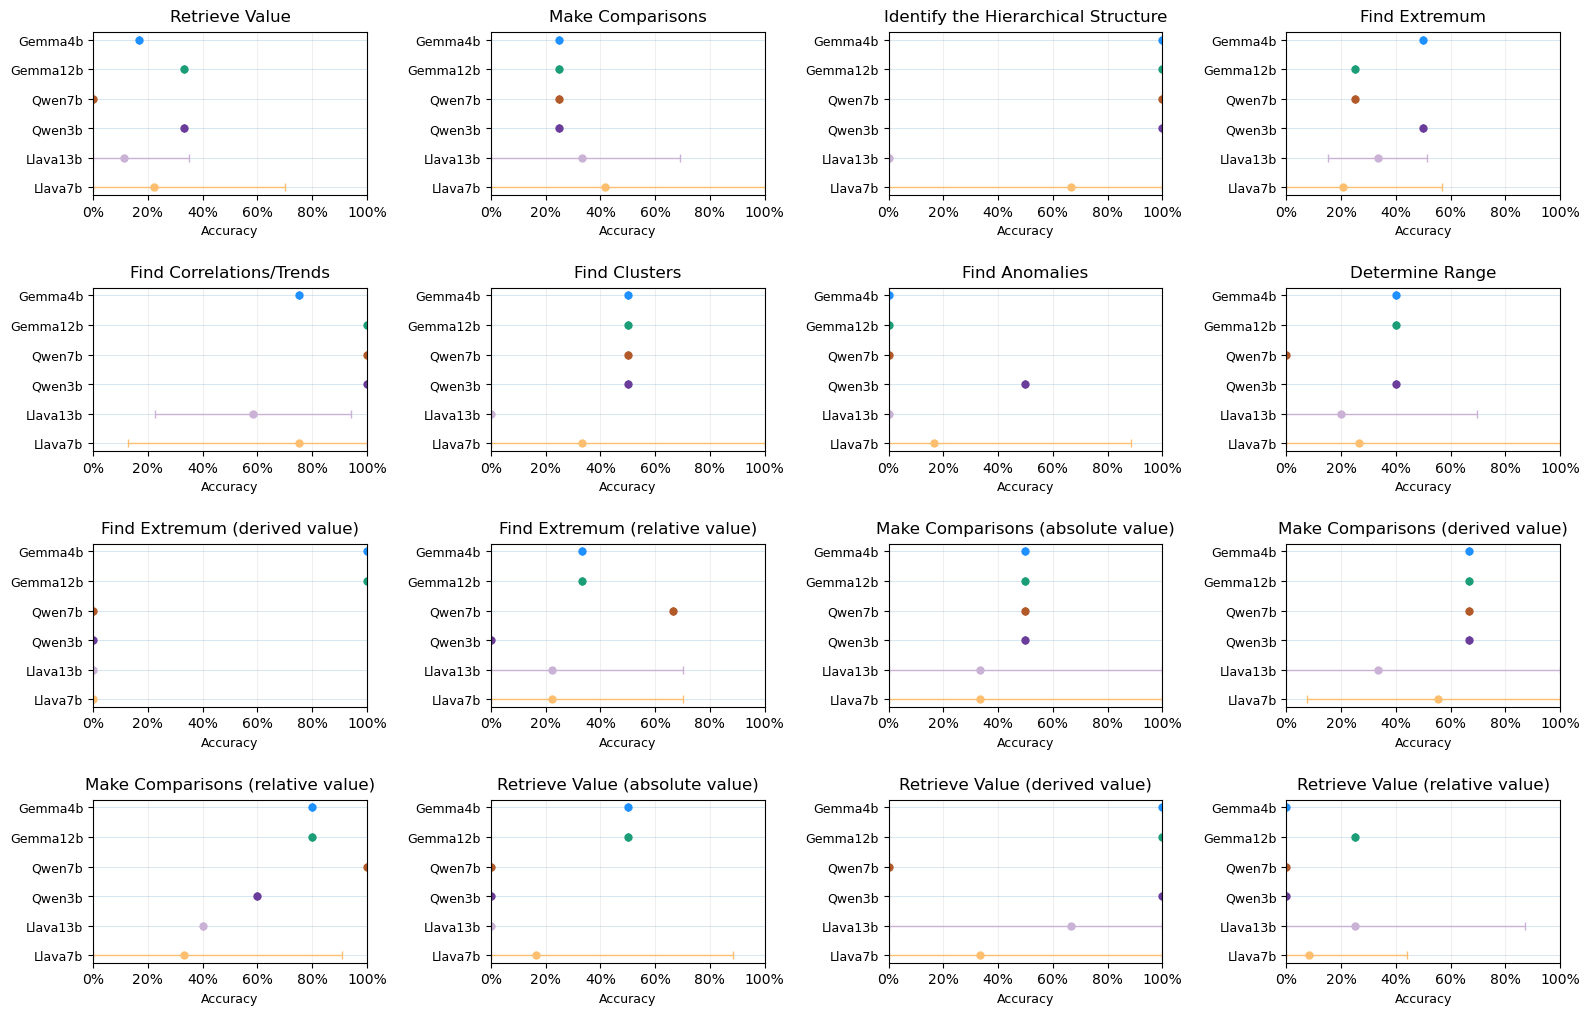

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

MODEL_SUMMARIES_TASK = [
    ("Llava7b",  "llava7b_task_vlat_accuracy_summary.csv"),
    ("Llava13b", "llava13b_task_vlat_accuracy_summary.csv"),
    ("Qwen3b",   "qwen2.5vl_3b_task_vlat_accuracy_summary.csv"),
    ("Qwen7b",   "qwen2.5vl_7b_task_vlat_accuracy_summary.csv"),
    ("Gemma12b", "gemma3_12b_task_vlat_accuracy_summary.csv"),
    ("Gemma4b",  "gemma3_4b_task_vlat_accuracy_summary.csv")
]

frames = []
for model, path in MODEL_SUMMARIES_TASK:
    df = pd.read_csv(path)

    # Normalize task column name if needed
    if "Task" not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"task","viztask","visualizationtask"}:
                df = df.rename(columns={c: "Task"})
                break
    if "Task" not in df.columns:
        raise KeyError(f"'Task' column not found in {path}")

    if "Model" not in df.columns:
        df["Model"] = model

    frames.append(df[["Task","Model","mean","ci_lo","ci_hi"]])

T = pd.concat(frames, ignore_index=True)

MODEL_ORDER = ["Llava7b","Llava13b","Qwen3b","Qwen7b","Gemma12b","Gemma4b"]
MODEL_ORDER = [m for m in MODEL_ORDER if m in T["Model"].unique()]

TASK_ORDER = [
    "Retrieve Value",
    "Make Comparisons",
    "Identify the Hierarchical Structure",
    "Find Extremum",
    "Find Correlations/Trends",
    "Find Clusters",
    "Find Anomalies",
    "Determine Range",
]
present = [t for t in TASK_ORDER if t in T["Task"].unique()]
others  = sorted([t for t in T["Task"].unique() if t not in present])
TASKS   = present + others

MODEL_COLORS = {
    "Llava7b":  "#fdbf6f",
    "Llava13b": "#cab2d6",
    "Qwen3b":   "#6a3d9a",
    "Qwen7b":   "#b15928",
    "Gemma4b":  "#1E90FF",
    "Gemma12b": "#1b9e77",
}

ncols = 4
nrows = int(np.ceil(len(TASKS)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 2.7*nrows), sharex=True)
axes = np.array(axes).reshape(-1)

for ax, task in zip(axes, TASKS):
    sub = T[T["Task"] == task].copy()
    sub = sub.set_index("Model").reindex(MODEL_ORDER).reset_index()

    y = np.arange(len(MODEL_ORDER))
    ax.hlines(y, xmin=0, xmax=100, linewidth=0.5, alpha=0.25)

    # one dot+CI per model row
    for i, row in sub.iterrows():
        if pd.notna(row["mean"]):
            color = MODEL_COLORS.get(row["Model"], "gray")
            lo = max(0, row["ci_lo"])   # clip to [0,100] for appearance
            hi = min(100, row["ci_hi"])
            ax.errorbar(
                row["mean"], y[i],
                xerr=[[row["mean"] - lo], [hi - row["mean"]]],
                fmt='o', color=color, ecolor=color,
                capsize=3, elinewidth=1, markersize=5
            )

    ax.set_title(task, fontsize=12, pad=8)
    ax.set_xlim(0, 100)
    ax.set_yticks(y)
    ax.set_yticklabels(MODEL_ORDER, fontsize=9)
    ax.set_xticks(np.arange(0, 101, 20))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))
    ax.tick_params(axis='x', which='both', labelbottom=True)  # show ticks on all rows
    ax.set_xlabel("Accuracy", fontsize=9)
    ax.grid(axis="x", alpha=0.2)

# turn off any unused axes (in case panels < nrows*ncols)
for ax in axes[len(TASKS):]:
    ax.axis("off")

# fig.suptitle("Model performance across visualization tasks in VLAT assessment (mean accuracy with 95% CI)", fontsize=14)
fig.tight_layout(rect=[0,0,1,0.95], h_pad=2.0, w_pad=1.5)
plt.savefig("vlat_tasks_dot_ci_panels.png", dpi=300, bbox_inches="tight")
plt.show()